# Data Processing

In [1]:
!source venv/bin/activate

In [1]:
# Read data
import pandas as pd
data = pd.read_csv('nyc-rolling-sales.csv')
pd.set_option('display.max_columns', None)

In [2]:
# remove "0" and "-" values on SALE PRICE into DataFrame
data_price = data[(data['SALE PRICE'] != ' -  ')]
data_price = data_price[(data_price['SALE PRICE'] != '0')]

In [3]:
# get "0" values on SALE PRICE into DataFrame
no_sale_price = data[(data['SALE PRICE'] == '0')] 
unique_zip_codes_zero_price = list(set(no_sale_price['ZIP CODE'].values))

# replace zero(0) values to average based on zip code
import numpy as np

for zip_code in unique_zip_codes_zero_price:
    # calculate average on zip code
    df = data_price[data_price['ZIP CODE'] == zip_code]
    mean = df['SALE PRICE'].apply(int).mean()
    
    # fix values
    fixed_df = data[data['ZIP CODE'] == zip_code]
    fixed_df['SALE PRICE'] = np.where(fixed_df['SALE PRICE'] == '0', str(mean) + ' *', fixed_df['SALE PRICE'])
    #fixed_df['SALE PRICE'] = np.where(fixed_df['SALE PRICE'] == ' -  ', str(mean) + ' *', fixed_df['SALE PRICE'])
    indices = fixed_df.index.to_list()
    for i, price in enumerate(fixed_df['SALE PRICE']):
        price_str = str(price)
        if price_str.split(' ')[-1] == '*':
            data['SALE PRICE'].iloc[indices[i]] = mean
    #print(f"zip code {zip_code}, average {str(mean)}")

/tmp/ipykernel_29179/3573056725.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_df['SALE PRICE'] = np.where(fixed_df['SALE PRICE'] == '0', str(mean) + ' *', fixed_df['SALE PRICE'])
/home/ak/Desktop/sentiment-data-visualize/env/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [4]:
# get "-" values on SALE PRICE into DataFrame
no_sale_price = data[(data['SALE PRICE'] == ' -  ')] #| (data['SALE PRICE'] == ' -  ')]['SALE PRICE'].value_counts()
unique_zip_codes_none_price = list(set(no_sale_price['ZIP CODE'].values))

# replace ' -  ' values to average based on zip code
import numpy as np
c = 0
for zip_code in unique_zip_codes_none_price:
    # calculate average on zip code
    df = data_price[data_price['ZIP CODE'] == zip_code]
    if df.shape[0]:
        mean = df['SALE PRICE'].apply(int).mean()
    
        # fix values
        fixed_df = data[data['ZIP CODE'] == zip_code]
        #fixed_df['SALE PRICE'] = np.where(fixed_df['SALE PRICE'] == '0', str(mean) + ' *', fixed_df['SALE PRICE'])
        fixed_df['SALE PRICE'] = np.where(fixed_df['SALE PRICE'] == ' -  ', str(mean) + ' *', fixed_df['SALE PRICE'])
        indices = fixed_df.index.to_list()
        for i, price in enumerate(fixed_df['SALE PRICE']):
            price_str = str(price)
            if price_str.split(' ')[-1] == '*':
                c+=1
                data['SALE PRICE'].iloc[indices[i]] = mean
    
    #print(f"zip code {zip_code}, average {str(mean)}")


/tmp/ipykernel_29179/235548538.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_df['SALE PRICE'] = np.where(fixed_df['SALE PRICE'] == ' -  ', str(mean) + ' *', fixed_df['SALE PRICE'])


In [5]:
data.shape

(84548, 22)

In [6]:
# remove single data
remove_data_indices = data[data['SALE PRICE'] == ' -  '].index
for idx in remove_data_indices:
    data = data.drop(idx)

data['SALE PRICE'] = data['SALE PRICE'].apply(float)
data.shape

(84546, 22)

In [7]:
data = data.drop(['SALE DATE', 'Unnamed: 0'], axis=1)
den = data.groupby('BUILDING CLASS CATEGORY').agg('count')
den = den[den<10]
den['BUILDING CLASS CATEGORY'] = den['BUILDING CLASS CATEGORY'].apply(lambda x: "other" if x in den else x)
den

KeyError: 'BUILDING CLASS CATEGORY'

In [11]:
# Feature selection
for col in data.columns:
    size = len(list(set(data[col].values)))
    print(f"There are {size}\t unit '{col}'\t Type: {data[col].dtype}")

There are 26735	 unit 'Unnamed: 0'	 Type: int64
There are 5	 unit 'BOROUGH'	 Type: int64
There are 254	 unit 'NEIGHBORHOOD'	 Type: object
There are 47	 unit 'BUILDING CLASS CATEGORY'	 Type: object
There are 11	 unit 'TAX CLASS AT PRESENT'	 Type: object
There are 11566	 unit 'BLOCK'	 Type: int64
There are 2627	 unit 'LOT'	 Type: int64
There are 1	 unit 'EASE-MENT'	 Type: object
There are 167	 unit 'BUILDING CLASS AT PRESENT'	 Type: object
There are 67561	 unit 'ADDRESS'	 Type: object
There are 3989	 unit 'APARTMENT NUMBER'	 Type: object
There are 184	 unit 'ZIP CODE'	 Type: int64
There are 176	 unit 'RESIDENTIAL UNITS'	 Type: int64
There are 55	 unit 'COMMERCIAL UNITS'	 Type: int64
There are 192	 unit 'TOTAL UNITS'	 Type: int64
There are 6061	 unit 'LAND SQUARE FEET'	 Type: object
There are 5690	 unit 'GROSS SQUARE FEET'	 Type: object
There are 158	 unit 'YEAR BUILT'	 Type: int64
There are 4	 unit 'TAX CLASS AT TIME OF SALE'	 Type: int64
There are 166	 unit 'BUILDING CLASS AT TIME OF SA

In [13]:
data_train = data.drop(['Unnamed: 0', 'EASE-MENT', 'ADDRESS', 'APARTMENT NUMBER', 'SALE DATE'], axis=1)
data_train

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009,5,0,5,1633,6440,1900,2,C2,6625000
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,10009,28,3,31,4616,18690,1900,2,C7,1968964
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,10009,16,1,17,2212,7803,1900,2,C7,1968964
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009,10,0,10,2272,6794,1913,2,C4,3936272
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009,6,0,6,2369,4615,1900,2,C2,8000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,10309,2,0,2,2400,2575,1998,1,B9,450000
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,10309,2,0,2,2498,2377,1998,1,B9,550000
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,10309,2,0,2,4000,1496,1925,1,B2,460000
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,10309,0,7,7,208033,64117,2001,4,K6,11693337


<AxesSubplot:>

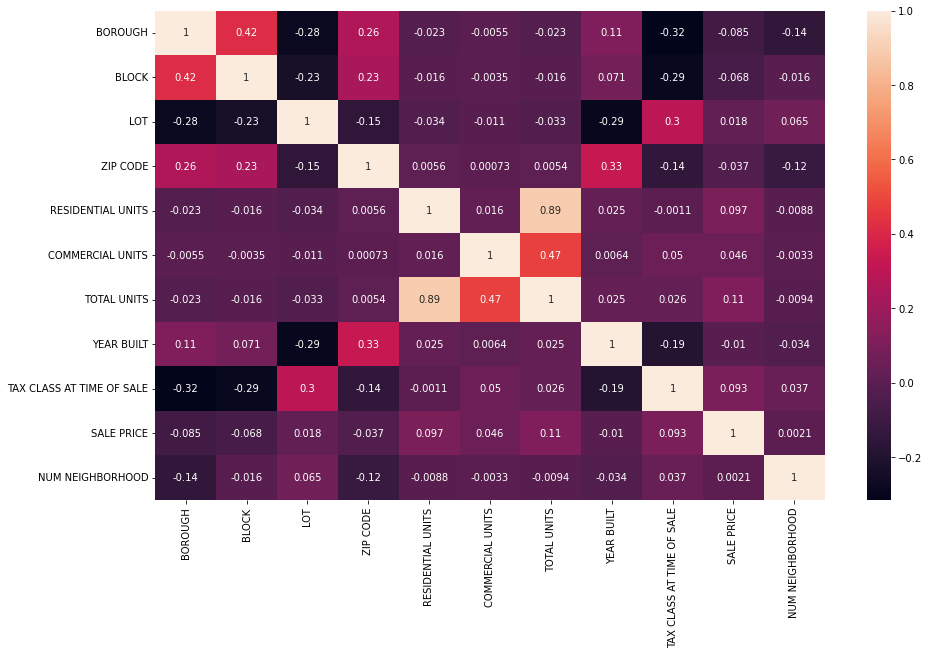

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_train['NUM NEIGHBORHOOD'] = le.fit_transform(data_train['NEIGHBORHOOD'])
data_train['NUM NEIGHBORHOOD'].apply(float)
data_train.drop('NEIGHBORHOOD', axis=1)
fig = plt.figure(figsize = (15, 9))
sns.heatmap(data_train.corr(), annot=True)

In [20]:
data_train['NUM NEIGHBORHOOD'] = data_train['NUM NEIGHBORHOOD'].apply(float)
data_train

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,NUM NEIGHBORHOOD
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009,5,0,5,1633,6440,1900,2,C2,6625000,1.0
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,10009,28,3,31,4616,18690,1900,2,C7,1968964,1.0
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,10009,16,1,17,2212,7803,1900,2,C7,1968964,1.0
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009,10,0,10,2272,6794,1913,2,C4,3936272,1.0
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009,6,0,6,2369,4615,1900,2,C2,8000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,10309,2,0,2,2400,2575,1998,1,B9,450000,251.0
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,10309,2,0,2,2498,2377,1998,1,B9,550000,251.0
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,10309,2,0,2,4000,1496,1925,1,B2,460000,251.0
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,10309,0,7,7,208033,64117,2001,4,K6,11693337,251.0


In [15]:
# Feature selection
for col in data_train.columns:
    size = len(list(set(data[col].values)))
    print(f"There are {size}\t unit '{col}'\t Type: {data[col].dtype}")

There are 5	 unit 'BOROUGH'	 Type: int64
There are 254	 unit 'NEIGHBORHOOD'	 Type: object
There are 47	 unit 'BUILDING CLASS CATEGORY'	 Type: object
There are 11	 unit 'TAX CLASS AT PRESENT'	 Type: object
There are 11566	 unit 'BLOCK'	 Type: int64
There are 2627	 unit 'LOT'	 Type: int64
There are 167	 unit 'BUILDING CLASS AT PRESENT'	 Type: object
There are 184	 unit 'ZIP CODE'	 Type: int64
There are 176	 unit 'RESIDENTIAL UNITS'	 Type: int64
There are 55	 unit 'COMMERCIAL UNITS'	 Type: int64
There are 192	 unit 'TOTAL UNITS'	 Type: int64
There are 6061	 unit 'LAND SQUARE FEET'	 Type: object
There are 5690	 unit 'GROSS SQUARE FEET'	 Type: object
There are 158	 unit 'YEAR BUILT'	 Type: int64
There are 4	 unit 'TAX CLASS AT TIME OF SALE'	 Type: int64
There are 166	 unit 'BUILDING CLASS AT TIME OF SALE'	 Type: object
There are 10187	 unit 'SALE PRICE'	 Type: int64


In [22]:
# convert object types to valuable for model
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_train['NUM NEIGHBORHOOD'] = le.fit_transform(data_train['NEIGHBORHOOD'])
data_train['NUM BUILDING CLASS CATEGORY'] = le.fit_transform(data_train['BUILDING CLASS CATEGORY'])
data_train['NUM TAX CLASS AT PRESENT'] = le.fit_transform(data_train['TAX CLASS AT PRESENT'])
data_train['NUM BUILDING CLASS AT PRESENT'] = le.fit_transform(data_train['BUILDING CLASS AT PRESENT'])
data_train['NUM BUILDING CLASS AT TIME OF SALE'] = le.fit_transform(data_train['BUILDING CLASS AT TIME OF SALE'])
data_train

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,NUM NEIGHBORHOOD,NUM BUILDING CLASS CATEGORY,NUM TAX CLASS AT PRESENT,NUM BUILDING CLASS AT PRESENT,NUM BUILDING CLASS AT TIME OF SALE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,10009,5,0,5,1900,2,C2,6625000,1,6,6,16,15
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C7,10009,28,3,31,1900,2,C7,1968964,1,6,5,21,20
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C7,10009,16,1,17,1900,2,C7,1968964,1,6,5,21,20
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,1913,2,C4,3936272,1,6,7,18,17
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,10009,6,0,6,1900,2,C2,8000000,1,6,6,16,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,B9,10309,2,0,2,1998,1,B9,450000,251,1,1,13,12
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,B9,10309,2,0,2,1998,1,B9,550000,251,1,1,13,12
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,B2,10309,2,0,2,1925,1,B2,460000,251,1,1,11,10
84546,5,WOODROW,22 STORE BUILDINGS,4,K6,10309,0,7,7,2001,4,K6,11693337,251,20,10,84,83


In [36]:
selected_features = []
# Feature selection
for col in data_train.columns:
    if data_train[col].dtype == int:
        selected_features.append(col)
selected_features

['BOROUGH',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE',
 'NUM NEIGHBORHOOD',
 'NUM BUILDING CLASS CATEGORY',
 'NUM TAX CLASS AT PRESENT',
 'NUM BUILDING CLASS AT PRESENT',
 'NUM BUILDING CLASS AT TIME OF SALE']

In [62]:
train['SALE PRICE'] = data['SALE PRICE'].apply(int)
type(train['SALE PRICE'].loc[0])

/tmp/ipykernel_24070/3632113648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['SALE PRICE'] = data['SALE PRICE'].apply(int)


numpy.int64

<AxesSubplot:>

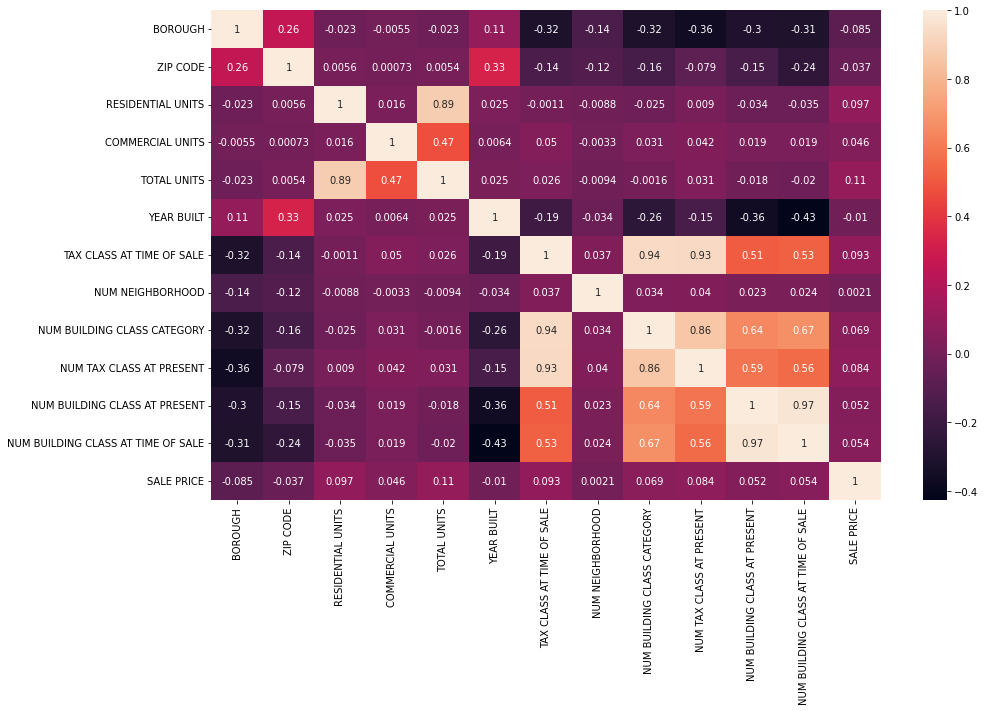

In [66]:
train = data_train[selected_features]
target = data['SALE PRICE'].apply(int)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=55)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=55)

In [69]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [70]:
lr.fit(X_train, y_train)

LinearRegression()

In [80]:
lr.score(X_test, y_test)

-0.9329593315803417